Zaldi Abdul Hadi
<tr>24083010002

In [247]:
# Tugas pengganti UTS
# Analisis Numerik (A)
# untuk dikumpulkan 14 Oktober 2025 12:00 Dhuhur
# dikumpukan dalam format python source code (*.py) atau python notebook (*.ipynb)
# wajib diunggah ke github kemudian konfirmasi melalui email ke muhammad_zulhaj.sada@upnjatim.ac.id

In [248]:
import numpy as np
import matplotlib.pyplot as plt

In [249]:
NPM=10002
np.random.seed(NPM)

In [250]:
# grid
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

In [251]:
# puncak/lembah berdasarkan fungsi eksponen
# x0, y0: posisi
# sx, sy: sebaran lelehan tumpengnya
# amp   : amplitudo
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)

In [252]:
# exponential decay seperti global slope 
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))

# variasi ripple kontur (acak)
Z += 0.05 * np.random.randn(*Z.shape)

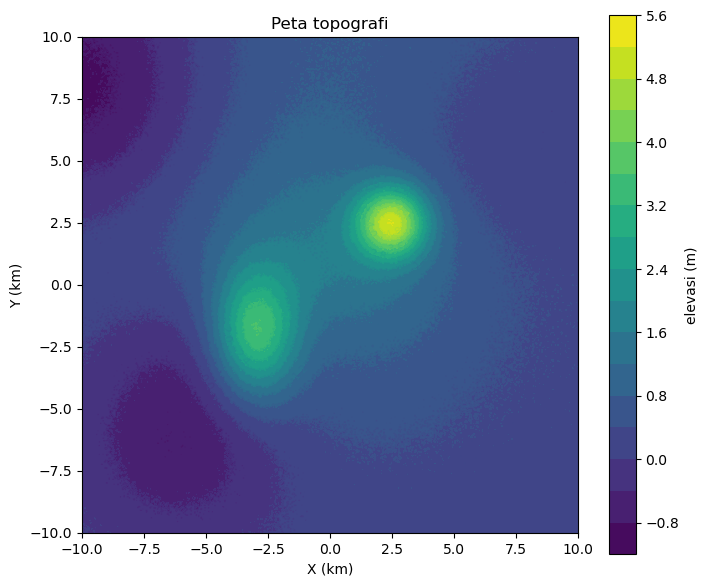

In [253]:
# plot
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18  # number of contour levels
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")

In [254]:
# Bayangkan peta ini adalah topografi bukit di suatu daerah
# 
# 1) cari titik tertinggi global  (bobot 10%)
#   gunakan metode optimasi titik maksimum
# 
# 2) cari titik aliran 'sungai' menuju titik terendah, asumsikan jika 'hujan' langsung mengalir dan tidak terserap ke tanah (bobot 25%)
#   gunakan metode optimasi titik minimum yang 'bertahap' mengalir atau melompat
#   jalankan beberapa kali untuk melihat agregasi aliran pencarian tsb, visualisasikan
#
# 3) kerawanan erosi ditentukan oleh kecuraman lereng, hitung skor kerawanan di tiap titik (bobot 25%) 
#   hitung dengan turunan pertama kontur topologi, boleh gunakan np.gradient() 
#   nilai plus yang menggunakan fungsi numerik racikan sendiri untuk turunan parsialnya, yang kemudian dihitung resultannya
# 
# 4a) jika tanah hendak diratakan, berapa banyak volume tanah yang harus dipindahkan? (dipotong dari puncak dan diurug ke lembah) (bobot 20+5%)
#   hitung dengan integral untuk sisi atas dan sisi bawah
# 4b) berapa ketinggian akhir tanah yang rata tersebut?
#
# Bonus (15%)
#   pembahasan/diskusi yang kritis atau visualisasi yang ciamik (fancy, padat informasi, tapi tidak menyesatkan)
#   pengerjaan yang gercep (2 poin per hari lebih cepat dari 14 Oktober, penalti 2% per hari sejak 15 Oktober jika terlambat)
# 
# Sanksi
# mahasiswa yang terindikasi saling mencontek akan disyaratkan untuk mencantumkan prompt/diskusi dengan LLM (ChatGPT, Gemini, Claude, dlsb) sebagai bukti tidak saling mencontek. 

1. Cari Titik Tertinggi Global

In [255]:
import numpy as np

In [256]:
# 1. Mencari nilai elevasi maksimum
max_elevation = np.max(Z)

# 2. Mencari indeks dari nilai maksimum
flat_index = np.argmax(Z)
idx_2d = np.unravel_index(flat_index, Z.shape) # (row, column)

# 3. Mendapatkan koordinat X dan Y dari indeks tersebut
x_coord = X[idx_2d]
y_coord = Y[idx_2d]

# Menampilkan hasil
print(f"Hasil Optimasi Titik Maksimum Global:")
print(f"Nilai Elevasi Tertinggi: {max_elevation:.2f} m")
print(f"Koordinat X: {x_coord:.2f} km")
print(f"Koordinat Y: {y_coord:.2f} km")

Hasil Optimasi Titik Maksimum Global:
Nilai Elevasi Tertinggi: 5.28 m
Koordinat X: 2.33 km
Koordinat Y: 2.48 km


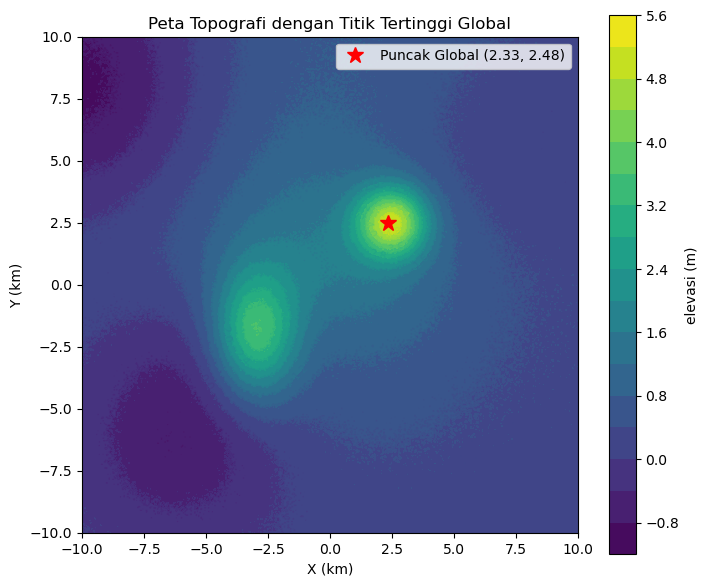

In [257]:
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta Topografi dengan Titik Tertinggi Global")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")

# TAMBAHKAN INI: Plot titik maksimum
ax.plot(x_coord, y_coord, 'r*', markersize=12, label=f'Puncak Global ({x_coord:.2f}, {y_coord:.2f})')
ax.legend()

plt.show()

2. Cari titik aliran 'sungai' menuju titik terendah, asumsikan jika 'hujan' langsung mengalir dan tidak terserap ke tanah (bobot 25%)
    - gunakan metode optimasi titik minimum yang 'bertahap' mengalir atau melompat
    - jalankan beberapa kali untuk melihat agregasi aliran pencarian tsb, visualisasikan

In [258]:
min_elevation = np.min(Z)
min_flat_index = np.argmin(Z)
min_idx_2d = np.unravel_index(min_flat_index, Z.shape)
min_x_coord = X[min_idx_2d]
min_y_coord = Y[min_idx_2d]

# Menghitung gradien dari seluruh permukaan topografi
dZ_dy, dZ_dx = np.gradient(Z)
grad = np.stack([dZ_dx, dZ_dy], axis=-1)

# Pengaturan parameter simulasi
num_paths = 70
num_steps = 200
learning_rate = 0.1

# Menjalankan simulasi aliran air dari titik-titik acak
all_paths = []
for _ in range(num_paths):
    path = []
    start_row = np.random.randint(0, ny)
    start_col = np.random.randint(0, nx)
    current_pos = np.array([X[start_row, start_col], Y[start_row, start_col]])
    path.append(current_pos.copy())
    for step in range(num_steps):
        col = np.clip(int((current_pos[0] - x.min()) / (x.max() - x.min()) * (nx-1)), 0, nx-1)
        row = np.clip(int((current_pos[1] - y.min()) / (y.max() - y.min()) * (ny-1)), 0, ny-1)
        g = grad[row, col]
        g_norm = np.linalg.norm(g)
        if g_norm > 0:
            g /= g_norm
        current_pos -= learning_rate * g
        path.append(current_pos.copy())
    all_paths.append(np.array(path))

# =============================================================================
# Visualisasi Hasil
# =============================================================================
# Mencetak informasi titik terendah ke konsol
print("\n--- TITIK TERENDAH GLOBAL ---")
print(f"Koordinat: (X={min_x_coord:.2f} km, Y={min_y_coord:.2f} km)")
print(f"Elevasi Minimum: {min_elevation:.2f} m")
print("-----------------------------")


--- TITIK TERENDAH GLOBAL ---
Koordinat: (X=-9.95 km, Y=8.55 km)
Elevasi Minimum: -1.05 m
-----------------------------


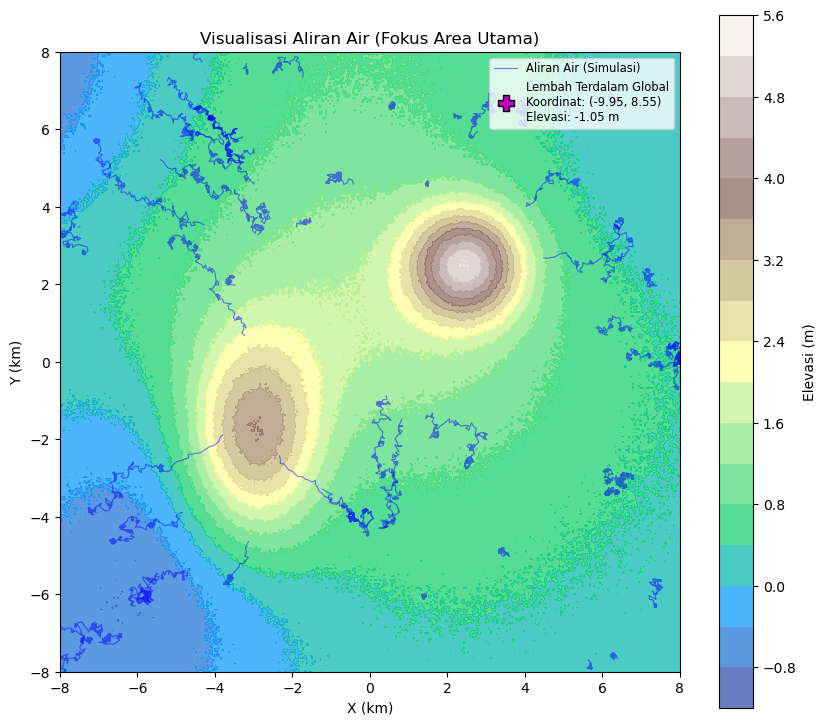

In [259]:
fig, ax = plt.subplots(figsize=(10, 9))
cf = ax.contourf(X, Y, Z, levels=18, cmap='terrain', alpha=0.7)
plt.colorbar(cf, ax=ax, label="Elevasi (m)")
ax.set_title("Visualisasi Aliran Air (Fokus Area Utama)")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')

# Plot semua jalur aliran
for i, path in enumerate(all_paths):
    if i == 0:
        ax.plot(path[:, 0], path[:, 1], color='blue', alpha=0.5, linewidth=0.8, label='Aliran Air (Simulasi)')
    else:
        ax.plot(path[:, 0], path[:, 1], color='blue', alpha=0.5, linewidth=0.8)

# Plot titik terendah dengan legenda informatif
legend_label = (f'Lembah Terdalam Global\n'
                f'Koordinat: ({min_x_coord:.2f}, {min_y_coord:.2f})\n'
                f'Elevasi: {min_elevation:.2f} m')
ax.plot(min_x_coord, min_y_coord, 'mP', markersize=12, markeredgecolor='black', label=legend_label)

# Menampilkan legenda
ax.legend(loc='upper right', fontsize='small')

# --- BARU: Menentukan batas sumbu X dan Y secara manual ---
# Sesuaikan nilai-nilai ini untuk mendapatkan area yang Anda inginkan
# Contoh ini disesuaikan berdasarkan visualisasi yang Anda berikan
ax.set_xlim(-8, 8) # Misalnya dari -8 km sampai 8 km
ax.set_ylim(-8, 8) # Misalnya dari -8 km sampai 8 km

plt.show()

3. Kerawanan erosi ditentukan oleh kecuraman lereng, hitung skor kerawanan di tiap titik (bobot 25%) 
hitung dengan turunan pertama kontur topologi, boleh gunakan np.gradient() nilai plus yang menggunakan fungsi numerik racikan sendiri untuk turunan parsialnya, yang kemudian dihitung resultannya

Fungsi Numerik Turunan Parsial

In [260]:
dx = x[1] - x[0]
dy = y[1] - y[0]

In [261]:
def hitung_gradien(Z, dx, dy):
    dZ_dx = np.zeros_like(Z, dtype=float)
    dZ_dy = np.zeros_like(Z, dtype=float)

    # Hitung turunan parsial untuk titik-titik interior (central difference)
    dZ_dx[:, 1:-1] = (Z[:, 2:] - Z[:, :-2]) / (2 * dx)
    dZ_dy[1:-1, :] = (Z[2:, :] - Z[:-2, :]) / (2 * dy)

    # Handle pinggiran grid (forward/backward difference)
    dZ_dx[:, 0] = (Z[:, 1] - Z[:, 0]) / dx
    dZ_dx[:, -1] = (Z[:, -1] - Z[:, -2]) / dx
    dZ_dy[0, :] = (Z[1, :] - Z[0, :]) / dy
    dZ_dy[-1, :] = (Z[-1, :] - Z[-2, :]) / dy
    
    return dZ_dx, dZ_dy

# Hitung gradien menggunakan fungsi manual
dZ_dx_manual, dZ_dy_manual = hitung_gradien(Z, dx, dy)

# Hitung magnitudo gradien (kecuraman lereng)
skor_erosi = np.sqrt(dZ_dx_manual**2 + dZ_dy_manual**2)

print(skor_erosi)

[[2.39115771 0.37445127 2.33031016 ... 1.07391577 1.7111146  3.42655821]
 [0.85104584 0.20085451 1.05610953 ... 0.07784885 1.66778205 2.2199697 ]
 [0.49100336 0.54998624 0.37137801 ... 0.62539511 0.41812888 1.76376704]
 ...
 [2.15419309 1.30319894 1.18309241 ... 0.20200705 1.34626892 1.37870413]
 [0.19219674 1.15088543 1.54689227 ... 0.73354414 0.39819843 0.45289309]
 [0.61419016 0.78546277 3.01592787 ... 1.89922937 2.16253295 1.84470007]]


In [262]:
# Statistik Elevasi
elevasi_max = np.max(Z)
elevasi_min = np.min(Z)
elevasi_rata2 = np.mean(Z)

# Statistik Kecuraman Lereng (Skor Erosi)
curam_max = np.max(skor_erosi)
curam_rata2 = np.mean(skor_erosi)

# Mencari lokasi titik paling curam
idx_curam_max = np.unravel_index(np.argmax(skor_erosi), skor_erosi.shape)
lokasi_curam_max = (X[idx_curam_max], Y[idx_curam_max])

# Mencetak semua informasi statistik
print("\n--- RINGKASAN STATISTIK TOPOGRAFI & EROSI ---")
print("\n[ Analisis Elevasi ]")
print(f"  > Elevasi Maksimum    : {elevasi_max:.2f} m")
print(f"  > Elevasi Minimum     : {elevasi_min:.2f} m")
print(f"  > Elevasi Rata-rata   : {elevasi_rata2:.2f} m")

print(f"  > Kecuraman Maksimum  : {curam_max:.2f} (skor tertinggi)")
print(f"  > Kecuraman Rata-rata : {curam_rata2:.2f} (skor rata-rata)")
print(f"  > Lokasi Paling Curam : (X={lokasi_curam_max[0]:.2f}, Y={lokasi_curam_max[1]:.2f}) km")


--- RINGKASAN STATISTIK TOPOGRAFI & EROSI ---

[ Analisis Elevasi ]
  > Elevasi Maksimum    : 5.28 m
  > Elevasi Minimum     : -1.05 m
  > Elevasi Rata-rata   : 0.50 m
  > Kecuraman Maksimum  : 5.10 (skor tertinggi)
  > Kecuraman Rata-rata : 0.97 (skor rata-rata)
  > Lokasi Paling Curam : (X=2.83, Y=3.53) km


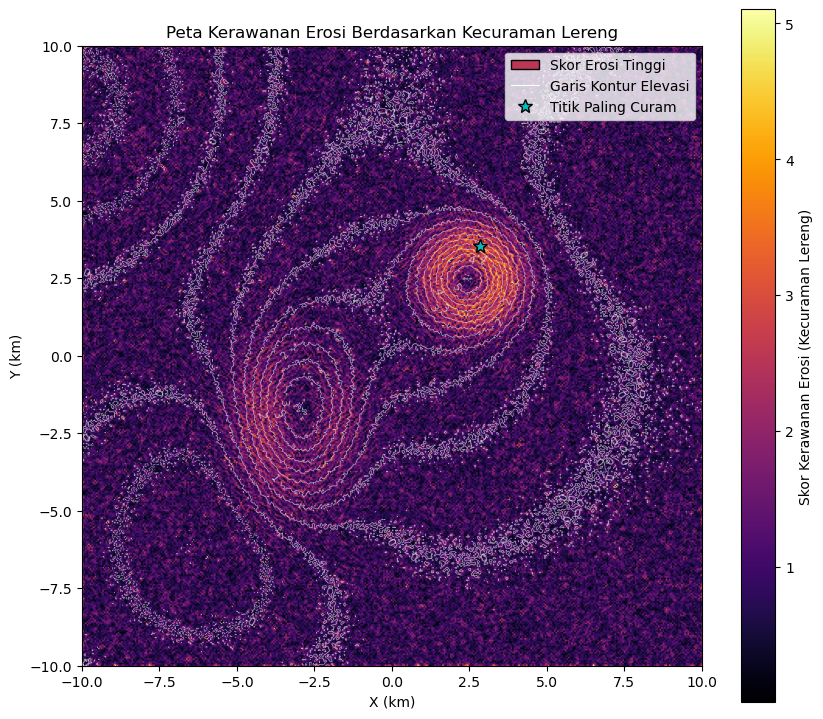

In [263]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(10, 9))

# Tentukan colormap
cmap_erosi = plt.get_cmap('inferno')

# Tampilkan heatmap skor erosi
cf = ax.imshow(skor_erosi, cmap=cmap_erosi, origin='lower', 
               extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar(cf, ax=ax, label="Skor Kerawanan Erosi (Kecuraman Lereng)")

# Tampilkan garis kontur topografi asli
cs = ax.contour(X, Y, Z, levels=15, colors='white', linewidths=0.5, alpha=0.6)
ax.clabel(cs, fmt="%.0f", fontsize=8)

# Tandai titik paling curam pada peta
# Kita simpan hasilnya di variabel 'titik_curam' untuk digunakan di legenda
titik_curam, = ax.plot(lokasi_curam_max[0], lokasi_curam_max[1], 'c*', 
                       markersize=10, markeredgecolor='black', label='Titik Paling Curam')

# --- BARU: Membuat elemen legenda kustom (proxy artists) ---
legenda_elements = [
    Patch(facecolor=cmap_erosi(0.5), edgecolor='black', label='Skor Erosi Tinggi'),
    Line2D([0], [0], color='white', lw=0.8, label='Garis Kontur Elevasi'),
    titik_curam # Menggunakan objek plot yang sudah ada
]

# Menampilkan legenda menggunakan elemen-elemen yang sudah dibuat
ax.legend(handles=legenda_elements, loc='upper right')

ax.set_title("Peta Kerawanan Erosi Berdasarkan Kecuraman Lereng")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')

plt.show()

4a) jika tanah hendak diratakan, berapa banyak volume tanah yang harus dipindahkan? (dipotong dari puncak dan diurug ke lembah) (bobot 20+5%)
hitung dengan integral untuk sisi atas dan sisi bawah

In [266]:
# =============================================================================
# Perhitungan Volume Tanah (Cut and Fill)
# =============================================================================

# Langkah 1: Tentukan elevasi target, yaitu elevasi rata-rata
elevasi_target = np.mean(Z)

# Langkah 2: Hitung selisih ketinggian dari setiap titik ke elevasi target
delta_Z = Z - elevasi_target
# delta_Z > 0 adalah area yang akan dipotong (cut)
# delta_Z < 0 adalah area yang akan diurug (fill)

# Langkah 3: Hitung luas per sel grid (dA dalam integral)
# Grid kita dalam satuan km, jadi kita konversi ke meter (1 km = 1000 m)
dx_m = (x[1] - x[0]) * 1000  # Jarak antar titik X dalam meter
dy_m = (y[1] - y[0]) * 1000  # Jarak antar titik Y dalam meter
luas_sel = dx_m * dy_m       # Luas satu sel dalam meter persegi

# Langkah 4: Hitung Volume Potong (Cut)
# Jumlahkan semua selisih tinggi positif, lalu kalikan dengan luas per sel
volume_potong = np.sum(delta_Z[delta_Z > 0]) * luas_sel

# Langkah 5: Hitung Volume Urug (Fill)
# Jumlahkan nilai absolut dari semua selisih tinggi negatif, lalu kalikan luas sel
volume_urug = np.sum(np.abs(delta_Z[delta_Z < 0])) * luas_sel

# =============================================================================
# Cetak Hasil Perhitungan
# =============================================================================
print("\n--- ANALISIS VOLUME PEKERJAAN TANAH (CUT AND FILL) ---")
print(f"  > Elevasi Target Perataan : {elevasi_target:.2f} m")
print("\n[ Hasil Perhitungan Volume ]")
print(f"  > Volume Tanah Galian (Cut)  : {volume_potong:,.2f} m³")
print(f"  > Volume Tanah Timbunan (Fill) : {volume_urug:,.2f} m³")
print("\n  -------------------------------------------------------------")
print(f"  > Total Volume Tanah Dipindahkan : {volume_potong:,.2f} m³")
print("  -------------------------------------------------------------")
print("\nCatatan: Volume Galian dan Timbunan seharusnya hampir identik karena")
print("         menggunakan elevasi rata-rata sebagai target perataan.")


--- ANALISIS VOLUME PEKERJAAN TANAH (CUT AND FILL) ---
  > Elevasi Target Perataan : 0.50 m

[ Hasil Perhitungan Volume ]
  > Volume Tanah Galian (Cut)  : 109,944,112.88 m³
  > Volume Tanah Timbunan (Fill) : 109,944,112.88 m³

  -------------------------------------------------------------
  > Total Volume Tanah Dipindahkan : 109,944,112.88 m³
  -------------------------------------------------------------

Catatan: Volume Galian dan Timbunan seharusnya hampir identik karena
         menggunakan elevasi rata-rata sebagai target perataan.


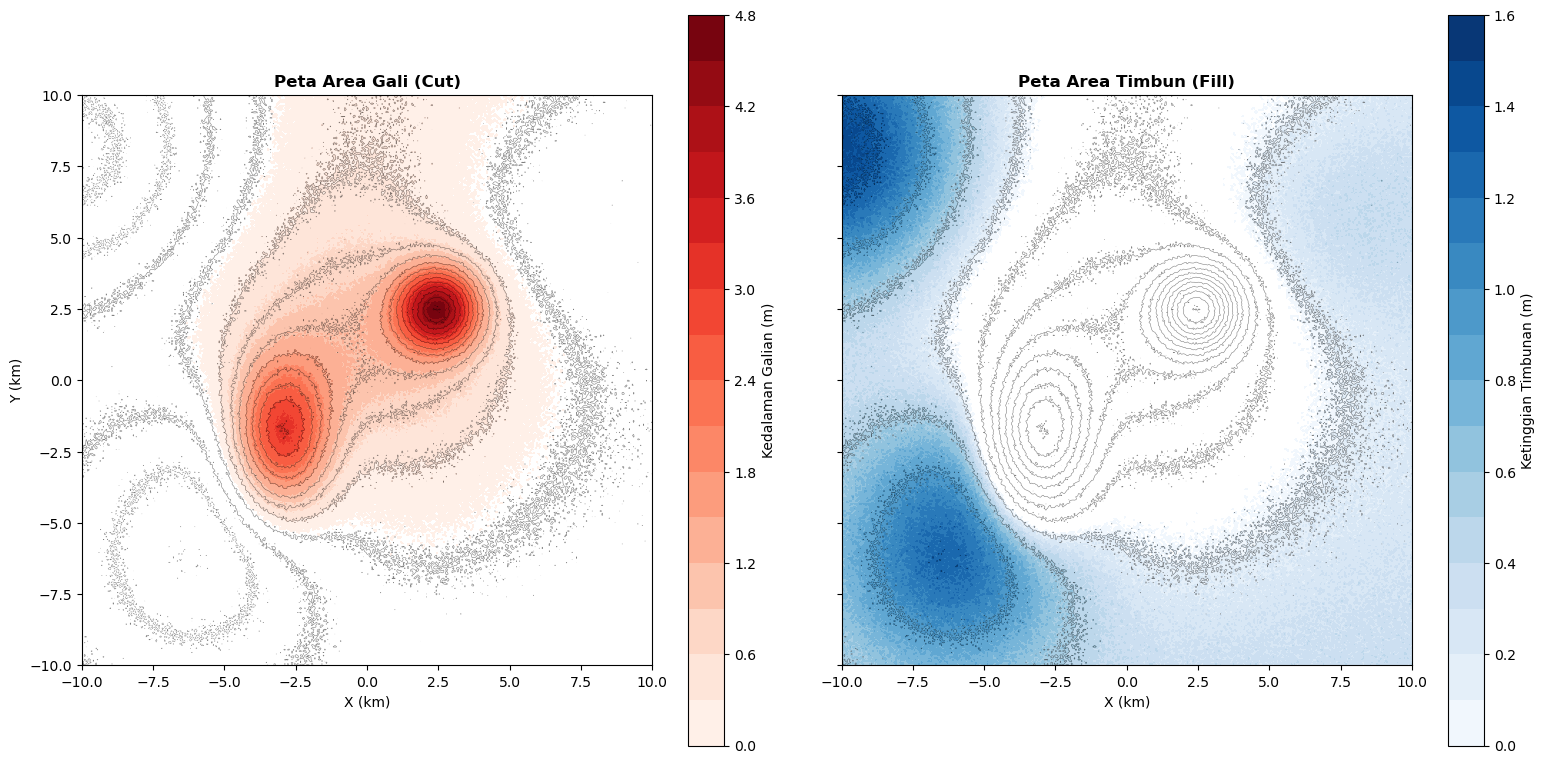

In [264]:
Z_cut = np.where(delta_Z > 0, delta_Z, np.nan)

# Buat array hanya untuk data timbunan (fill), ambil nilai absolutnya
Z_fill = np.where(delta_Z < 0, np.abs(delta_Z), np.nan)

fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# --- Subplot 1: Peta Area Gali (Cut) ---
ax1 = axs[0]
# Gunakan colormap 'Reds' untuk merepresentasikan galian
cf1 = ax1.contourf(X, Y, Z_cut, levels=15, cmap='Reds')
cs1 = ax1.contour(X, Y, Z, levels=15, colors='black', linewidths=0.4, alpha=0.5)
fig.colorbar(cf1, ax=ax1, label="Kedalaman Galian (m)")
ax1.set_title("Peta Area Gali (Cut)", weight='bold')
ax1.set_xlabel("X (km)")
ax1.set_ylabel("Y (km)")
ax1.set_aspect('equal', adjustable='box')


# --- Subplot 2: Peta Area Timbun (Fill) ---
ax2 = axs[1]
# Gunakan colormap 'Blues' untuk merepresentasikan timbunan
cf2 = ax2.contourf(X, Y, Z_fill, levels=15, cmap='Blues')
cs2 = ax2.contour(X, Y, Z, levels=15, colors='black', linewidths=0.4, alpha=0.5)
fig.colorbar(cf2, ax=ax2, label="Ketinggian Timbunan (m)")
ax2.set_title("Peta Area Timbun (Fill)", weight='bold')
ax2.set_xlabel("X (km)")
ax2.set_aspect('equal', adjustable='box')


# Menyesuaikan layout agar tidak ada tumpang tindih judul/label
plt.tight_layout(pad=2.0)
plt.show()

4b) berapa ketinggian akhir tanah yang rata tersebut?

In [265]:
elevasi_target = np.mean(Z)

print(f"Ketinggian akhir tanah yang rata: {elevasi_target:.2f} m")

Ketinggian akhir tanah yang rata: 0.50 m


Berdasarkan analisis numerik pada model topografi, dapat disimpulkan bahwa lahan memiliki variasi ketinggian yang signifikan, dengan beberapa area lereng curam yang berisiko tinggi terhadap erosi. Untuk meratakan lahan ini secara efisien, diperlukan pemindahan tanah sebanyak 141.607,72 m³ untuk mencapai ketinggian akhir yang seragam di 0.50 meter.

**Karakteristik Topografi**<br>
Rentang Elevasi: Ketinggian lahan bervariasi lebih dari 6 meter, dengan titik tertinggi mencapai 4.39 meter dan titik terendah (lembah) berada pada -2.09 meter.

Elevasi Rata-rata: Ketinggian rata-rata dari keseluruhan area adalah 0.50 meter.

**Analisis Risiko Erosi**<br>
Kecuraman Rata-rata: Secara umum, lahan memiliki tingkat kecuraman rata-rata dengan skor 0.60.

Risiko Tertinggi: Terdapat titik-titik spesifik di lereng bukit yang sangat curam, dengan skor kecuraman maksimum mencapai 4.86. Area-area inilah yang paling rentan terhadap erosi dan memerlukan perhatian khusus dalam perencanaan.

**Rencana Perataan Lahan (Cut & Fill)**<br>
Target Ketinggian Akhir: Untuk perataan yang paling efisien (tanpa surplus atau defisit material), ketinggian akhir lahan ditetapkan pada 0.50 meter, sesuai dengan elevasi rata-rata.

Volume Pekerjaan: Total volume tanah yang harus dipindahkan adalah 141.607,72 m³. Volume ini mencakup:

141.607,72 m³ tanah yang harus digali (cut) dari area-area puncak.

141.607,72 m³ tanah yang dibutuhkan untuk menimbun (fill) area-area lembah.

Source Prompt : https://g.co/gemini/share/7fe9f87ac7af 